In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Step 2: Load Dataset
df = pd.read_csv("Stock_Price_Data.csv")
print("First 5 records:")
print(df.head())

First 5 records:
   Day  Open  High  Low  Close  Volume
0    1   100   102   99    101  120000
1    2   101   103  100    102  125000
2    3   102   104  101    103  128000
3    4   103   105  102    104  130000
4    5   104   106  103    105  133000


In [3]:
# Step 3: Prepare Data
# Independent variable: Day (X)
# Dependent variable: Closing Price (y)
X = df["Day"].values.reshape(-1, 1)
y = df["Close"].values

# Step 4: Train Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Step 5: Model Evaluation
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.4f}")


Model Evaluation:
Mean Squared Error: 0.00
R2 Score: 1.0000


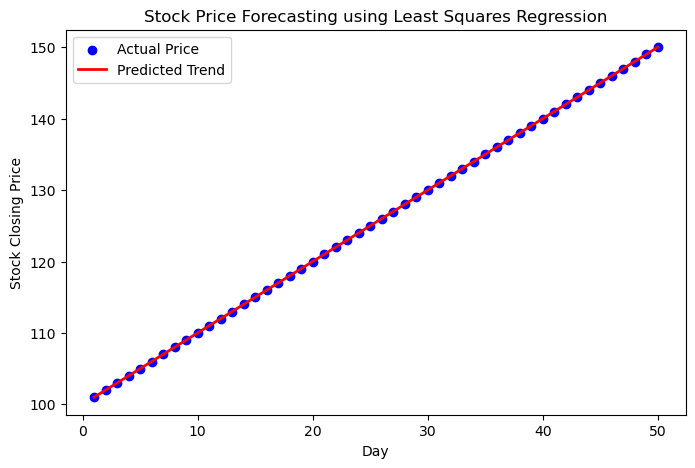

In [4]:
# Step 6: Visualize Actual vs Predicted Prices
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', label='Actual Price')
plt.plot(X, y_pred, color='red', linewidth=2, label='Predicted Trend')
plt.xlabel("Day")
plt.ylabel("Stock Closing Price")
plt.title("Stock Price Forecasting using Least Squares Regression")
plt.legend()
plt.show()

In [5]:
# Step 7: Forecast Future Prices
future_days = np.array([[51], [52], [53], [54], [55]])
future_predictions = model.predict(future_days)

forecast_df = pd.DataFrame({
    "Future_Day": [51, 52, 53, 54, 55],
    "Predicted_Price": np.round(future_predictions, 2)
})

print("\nFuture Stock Price Forecast (Next 5 Days):")
print(forecast_df)


Future Stock Price Forecast (Next 5 Days):
   Future_Day  Predicted_Price
0          51            151.0
1          52            152.0
2          53            153.0
3          54            154.0
4          55            155.0


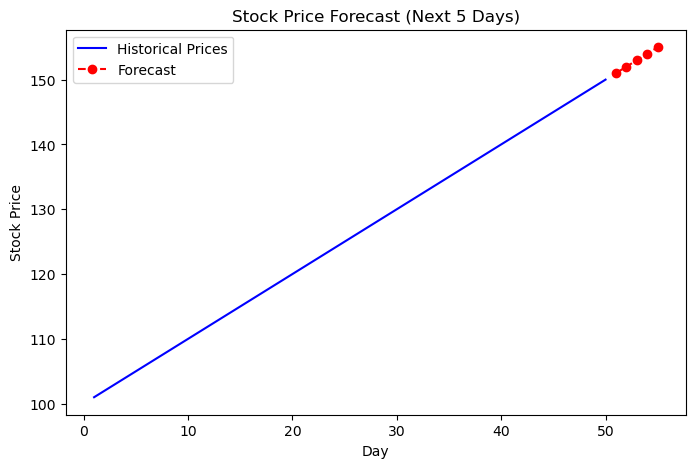

In [6]:
# Step 8: Visualize Future Forecast
plt.figure(figsize=(8,5))
plt.plot(df["Day"], y, label="Historical Prices", color="blue")
plt.plot(forecast_df["Future_Day"], forecast_df["Predicted_Price"], "ro--", label="Forecast")
plt.xlabel("Day")
plt.ylabel("Stock Price")
plt.title("Stock Price Forecast (Next 5 Days)")
plt.legend()
plt.show()